Importing Dataset

In [4]:
import pandas as pd
raisin = pd.read_csv("Raisin_Dataset.csv")
raisin.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [5]:
# Create training and testing sets for your model
from sklearn.model_selection import train_test_split

target = raisin['Class']
del raisin['Class']
X_train, X_test, y_train, y_test = train_test_split(raisin, target, test_size=0.2, random_state=42)

Model 1: Logistic Regression

In [6]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import time

logistic_regression = make_pipeline(StandardScaler(), LogisticRegression())

start = time.time()
logistic_regression.fit(X_train, y_train)
end = time.time()
train_time = (end - start)
print("Training Time: ", train_time)
accuracy = logistic_regression.score(X_train, y_train)
print(f"Accuracy on train set: {accuracy:.3f}")

start = time.time()
test_pred = logistic_regression.predict(X_test)
end = time.time()
query_time = (end - start)
print("Query Time: ", query_time)

accuracy = logistic_regression.score(X_test, y_test)
print(f"Accuracy on test set: {accuracy:.3f}")

Training Time:  0.04259133338928223
Accuracy on train set: 0.868
Query Time:  0.0016078948974609375
Accuracy on test set: 0.856


Model 2: Decision Tree

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

train_score = tree.score(X_train, y_train)
print(f"Accuracy of training: {train_score:.2f}")

test_score = tree.score(X_test, y_test)
print(f"Accuracy of testing: {test_score:.2f}")

Accuracy of training: 1.00
Accuracy of testing: 0.79


In [8]:
max_depths = range(1,31)
train_score = []
test_score = []
for d in max_depths:
    tree = DecisionTreeClassifier(max_depth=d, random_state=42)

    tree.fit(X_train, y_train)
    train_score.append(tree.score(X_train, y_train))

    test_score.append(tree.score(X_test, y_test))

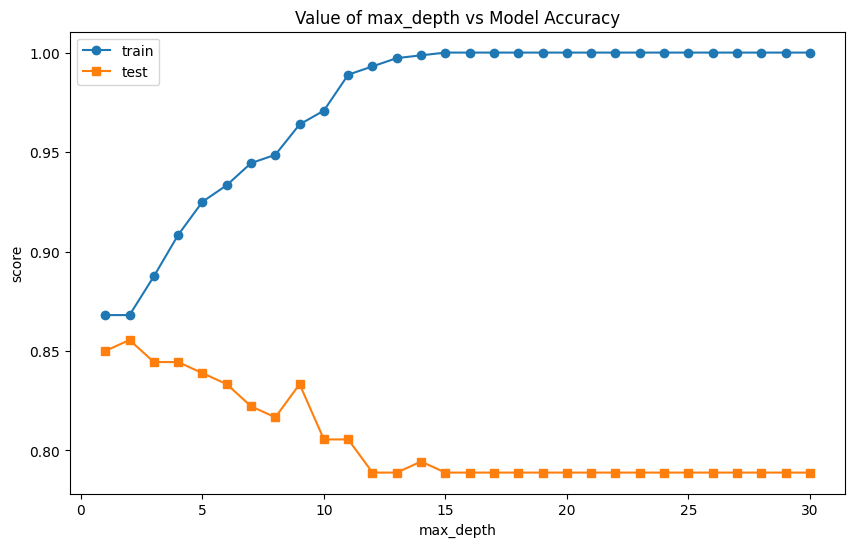

In [9]:
# plotting the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(max_depths , train_score, 'o-', label='train')
plt.plot(max_depths , test_score, 's-', label='test')
plt.xlabel('max_depth')
plt.ylabel('score')
plt.title('Value of max_depth vs Model Accuracy')
plt.legend()

In [10]:
# decision tree with max_depth as 4
tree = DecisionTreeClassifier(max_depth=4,random_state=42)

start = time.time()
tree.fit(X_train, y_train)
end = time.time()
train_time = (end - start)
print("Training Time: ", train_time)
train_score = tree.score(X_train, y_train)
print(f"Accuracy of training: {train_score:.2f}")

start = time.time()
test_pred = tree.predict(X_test)
end = time.time()
query_time = (end - start)
print("Query Time: ", query_time)

test_score = tree.score(X_test, y_test)
print(f"Accuracy of testing: {test_score:.2f}")

Training Time:  0.00553584098815918
Accuracy of training: 0.91
Query Time:  0.0009715557098388672
Accuracy of testing: 0.84


Model 3: K-nearest neighbors 

In [23]:
from sklearn.neighbors import KNeighborsClassifier

ks = range(1,51)
train_score = []
test_score = []

for k in ks:
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    train_score.append(knn.score(X_train,y_train))

    test_score.append(knn.score(X_test,y_test))   

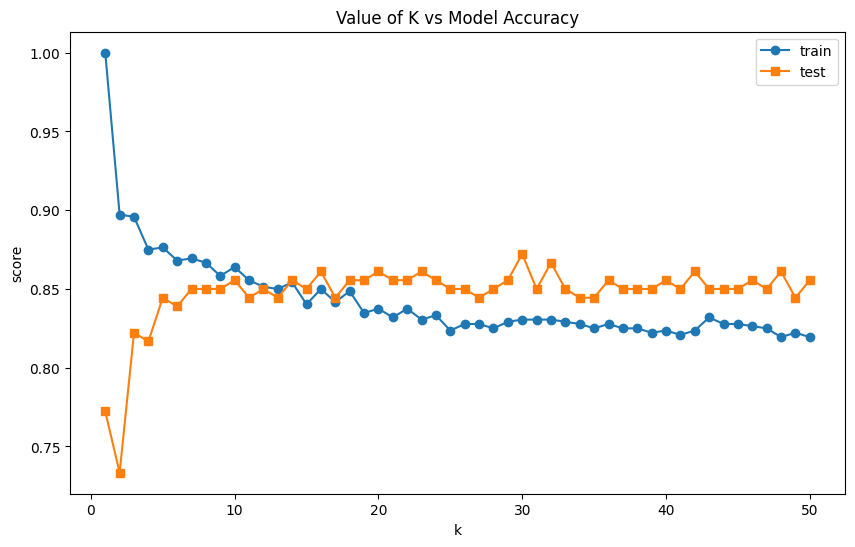

In [12]:
# Plotting the results
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(ks , train_score, 'o-', label='train')
plt.plot(ks , test_score, 's-', label='test')
plt.xlabel('k')
plt.ylabel('score')
plt.title('Value of K vs Model Accuracy')
plt.legend()

In [25]:
# Manhattan distance  metric
from sklearn.metrics import pairwise_distances

knn= KNeighborsClassifier(n_neighbors=9, metric='manhattan')

start = time.time()
knn.fit(X_train,y_train)
end = time.time()
train_time = (end - start)
print("Training Time: ", train_time)
train_score = (knn.score(X_train,y_train))
print(f"Accuracy of training: {train_score:.2f}")

start = time.time()
test_pred = knn.predict(X_test)
end = time.time()
query_time = (end - start)
print("Query Time: ", query_time)

test_score = (knn.score(X_test,y_test))
print(f"Accuracy of testing: {test_score:.2f}")

Training Time:  0.004123210906982422
Accuracy of training: 0.86
Query Time:  0.009769439697265625
Accuracy of testing: 0.86


In [14]:
# Euclidean  distance metric
knn= KNeighborsClassifier(n_neighbors=9, metric='euclidean')

start = time.time()
knn.fit(X_train,y_train)
end = time.time()
train_time = (end - start)
print("Training Time: ", train_time)
train_score = (knn.score(X_train,y_train))
print(f"Accuracy of training: {train_score:.2f}")

start = time.time()
test_pred = knn.predict(X_test)
end = time.time()
query_time = (end - start)
print("Query Time: ", query_time)

test_score = (knn.score(X_test,y_test))
print(f"Accuracy of testing: {test_score:.2f}")

Training Time:  0.0043103694915771484
Accuracy of training: 0.86
Query Time:  0.014043331146240234
Accuracy of testing: 0.85


In [15]:
# Cityblock  distance metric
knn= KNeighborsClassifier(n_neighbors=9, metric='cityblock')

start = time.time()
knn.fit(X_train,y_train)
end = time.time()
train_time = (end - start)
print("Training Time: ", train_time)
train_score = (knn.score(X_train,y_train))
print(f"Accuracy of training: {train_score:.2f}")

start = time.time()
test_pred = knn.predict(X_test)
end = time.time()
query_time = (end - start)
print("Query Time: ", query_time)

test_score = (knn.score(X_test,y_test))
print(f"Accuracy of testing: {test_score:.2f}")

Training Time:  0.003775358200073242


Accuracy of training: 0.86
Query Time:  0.011730432510375977
Accuracy of testing: 0.86


Model 4: Random Forest

In [16]:
# graph to determine the best value for max_depth
from sklearn.ensemble import RandomForestClassifier
import numpy as np
train_score = []
test_score = []
md = range(1,20,2)
for i, k in enumerate(md):
    rf = RandomForestClassifier(random_state = 42, max_depth = k)
    rf.fit(X_train, y_train)
    train_score.append(rf.score(X_train, y_train))
    test_score.append(rf.score(X_test, y_test))


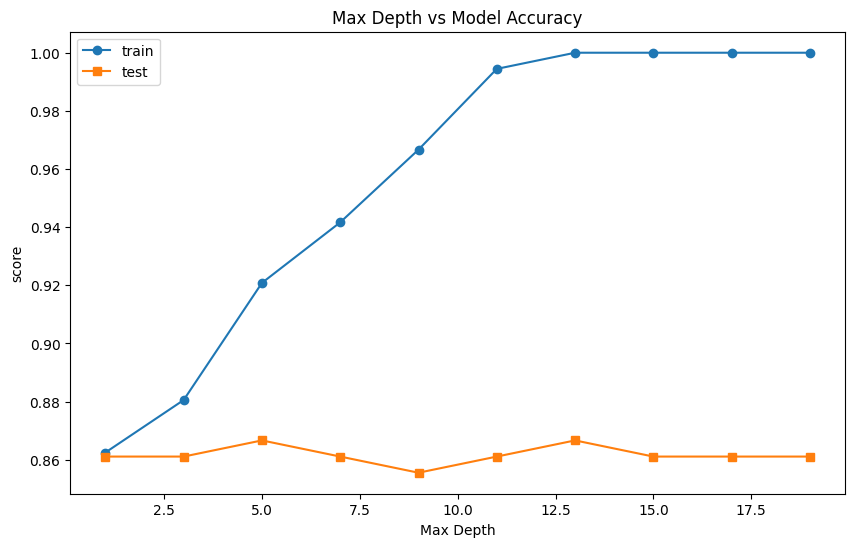

In [17]:
# Plotting the results
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(md , train_score, 'o-', label='train')
plt.plot(md , test_score, 's-', label='test')
plt.xlabel('Max Depth')
plt.ylabel('score')
plt.title('Max Depth vs Model Accuracy')
plt.legend()

In [18]:
# graph to determine the best value for n_estimators
from sklearn.ensemble import RandomForestClassifier
import numpy as np
train_score = []
test_score = []
estimators = range(1,200,10)
for i, k in enumerate(estimators):
    rf = RandomForestClassifier(random_state = 42, n_estimators = k, max_depth=5)
    rf.fit(X_train, y_train)
    train_score.append(rf.score(X_train, y_train))
    test_score.append(rf.score(X_test, y_test))

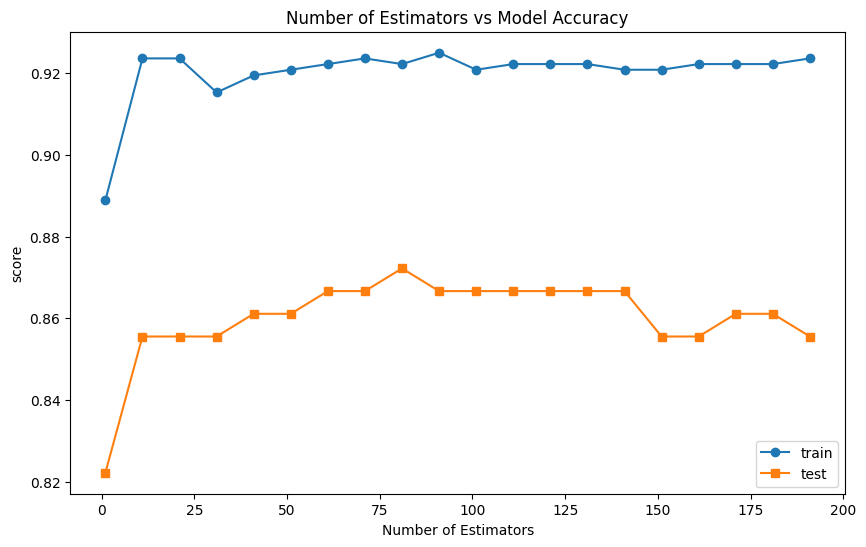

In [19]:
# Plotting the results
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(estimators , train_score, 'o-', label='train')
plt.plot(estimators , test_score, 's-', label='test')
plt.xlabel('Number of Estimators')
plt.ylabel('score')
plt.title('Number of Estimators vs Model Accuracy')
plt.legend()

In [26]:
# final  random forest model
rf = RandomForestClassifier(random_state=42, n_estimators=80, max_depth=5)

start = time.time()
rf.fit(X_train,y_train)
end = time.time()
train_time = (end - start)
print("Training Time: ", train_time)
train_score = (rf.score(X_train,y_train))
print(f"Accuracy of training: {train_score:.2f}")

start = time.time()
test_pred = rf.predict(X_test)
end = time.time()
query_time = (end - start)
print("Query Time: ", query_time)

test_score = (rf.score(X_test,y_test))
print(f"Accuracy of testing: {test_score:.2f}")

Training Time:  0.13984918594360352
Accuracy of training: 0.92
Query Time:  0.0076406002044677734
Accuracy of testing: 0.87
